In [1]:
using Flux
using Distributions
using Gadfly
using CairoMakie

In [5]:
f(x) = cos(x) + rand(Normal(0, 0.1))

xtrain = collect(-3:0.1:3)
ytrain = f.(xtrain);

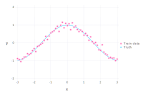

In [6]:
# Gadfly
dots = layer(x=xtrain, y=ytrain, color=[colorant"hotpink"], Geom.point)
lines = layer(x=xtrain, y=cos.(xtrain), color=[colorant"deepskyblue"], Geom.line)
legend = Guide.manual_color_key(
    "",
    ["Train data", "Truth"],
    ["hotpink", "deepskyblue"],
    shape=[Shape.circle, Shape.hline]
)
Gadfly.plot(dots, lines, legend)

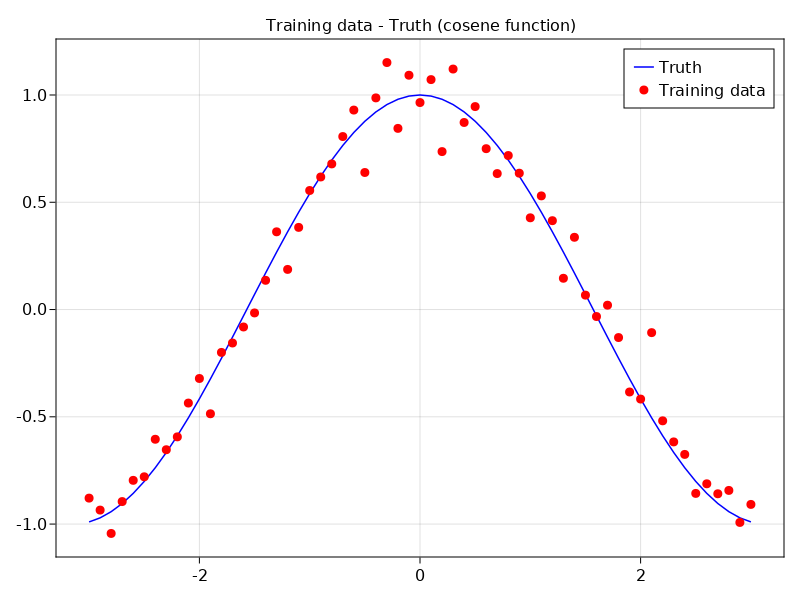

In [8]:
# CairoMakie
fig = Figure()
ax = Axis(fig[1, 1], title="Training data - Truth (cosene function)")
lines!(xtrain, cos.(xtrain), color=:blue, label="Truth")
scatter!(xtrain, ytrain, color=:red, label="Training data")
axislegend()
fig

In [9]:
model = Chain(Dense(1, 2, tanh), Dense(2, 1))
loss(x, y) = Flux.Losses.mse(model(x), y)
optimiser = Descent(0.1);

In [10]:
x = rand(Normal(), 100)
y = f.(x)
train_data = Iterators.repeated((Array(x'), Array(y')), 100)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Matrix{Float64}, Matrix{Float64}}}}(Base.Iterators.Repeated{Tuple{Matrix{Float64}, Matrix{Float64}}}(([-0.0903685663706192 -1.0547374286463385 … 0.3627008450821637 -0.10361691252052418], [0.9599082105806712 0.4235959840727858 … 0.9060251859273797 0.9418250434651017])), 100)

In [11]:
Flux.@epochs 10 Flux.train!(loss, Flux.params(model), train_data, optimiser);

┌ Info: Epoch 1
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 2
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 3
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 4
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 5
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 6
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 7
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 8
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 9
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 10
└ @ Main C:\Users\jnovoa\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138


In [12]:
ŷ = zeros(length(xtrain))
for (i, x) in enumerate(xtrain)
    ŷ[i] = model([xtrain[i]])[1]
end

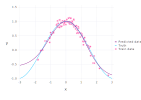

In [13]:
# Gadfly
predicted = layer(x=xtrain, y=ŷ, color=[colorant"purple"], Geom.line)
truevalue = layer(x=xtrain, y=cos.(xtrain), color=[colorant"deepskyblue"], Geom.line)
data = layer(x=x, y=y, color=[colorant"hotpink"], Geom.point)
legend = Guide.manual_color_key(
    "",
    ["Predicted data", "Truth", "Train data"],
    ["purple", "deepskyblue", "hotpink"],
    shape=[Shape.hline, Shape.hline, Shape.circle]
)
Gadfly.plot(predicted, truevalue, data, legend)

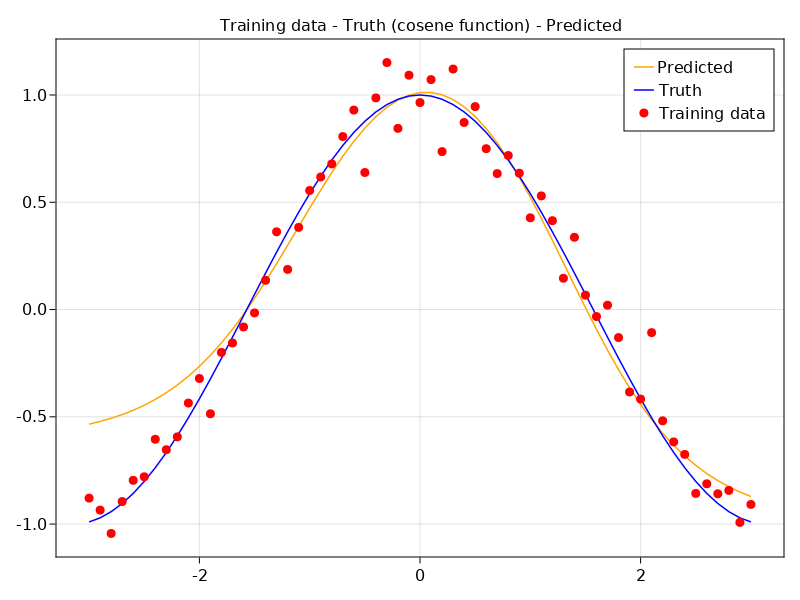

In [14]:
# CairoMakie
fig = Figure()
ax = Axis(fig[1, 1], title="Training data - Truth (cosene function) - Predicted")
lines!(xtrain, ŷ, color=:orange, label="Predicted")
lines!(xtrain, cos.(xtrain), color=:blue, label="Truth")
scatter!(xtrain, ytrain, color=:red, label="Training data")
axislegend()
fig